In [1]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

#Create the connection with the date base
def create_connection():
    try:
        client = pymongo.MongoClient("mongodb://localhost:27017/")
        return client["IUM"], client # Change the database name for your name
    except pymongo.errors.ConnectionFailure as e:
        print(f"Connection failed: {e}")
        return None, None

#Close the connection with the database
def close_connection(client):
    # Close connection
    if client is not None:  # Check for None explicitly
        client.close()

db, client = create_connection()

CREATION OF THE DATAFRAMES FOR EACH COLLECTION OF MONGODB

In [2]:
def getGames(db):
    try:
        collection = db["games"]
        games = list(collection.find())
        return games
    except Exception as e:
            print(f"Retrieval of Games failed: {e}")
            return []

gamesInfo = getGames(db)   
games_df = pd.DataFrame(gamesInfo)
games_df

,_id,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,...,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type,home_club_formation,away_club_formation
0,65944f08b6c1148df9b5a41b,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,NaN,NaN
1,65944f08b6c1148df9b5a41c,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,NaN,NaN
2,65944f08b6c1148df9b5a41d,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,NaN,NaN
3,65944f08b6c1148df9b5a41e,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league,NaN,NaN
4,65944f08b6c1148df9b5a41f,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,65944f0fb6c1148df9b6a2d8,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,...,Philips Stadion,10000.0,Cristian Balaj,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup,NaN,NaN
65212,65944f0fb6c1148df9b6a2d9,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup,NaN,NaN
65213,65944f0fb6c1148df9b6a2da,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,NaN,NaN
65214,65944f0fb6c1148df9b6a2db,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,Stoke City,NaN,6:1,other,4-2-3-1,4-2-3-1


In [3]:
def getClubs(db):
    try:
        collection = db["clubs"]
        clubs = list(collection.find())
        return clubs
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []
    
clubsInfo = getClubs(db)
clubs_df = pd.DataFrame(clubsInfo)
clubs_df

,_id,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,url
0,65944d8cb6c1148df990a787,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,65944d8cb6c1148df990a788,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,65944d8cb6c1148df990a789,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,65944d8cb6c1148df990a78a,12,as-rom,Associazione Sportiva Roma,IT1,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,65944d8cb6c1148df990a78b,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,65944d8cb6c1148df990a92c,68608,cf-os-belenenses,CF Os Belenenses,PO1,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,65944d8cb6c1148df990a92d,724,fc-volendam,Football Club Volendam,NL1,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,65944d8cb6c1148df990a92e,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,65944d8cb6c1148df990a92f,979,moreirense-fc,Moreirense Futebol Clube,PO1,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [4]:
#appearances
def getAppearances(db):
    try:
        collection = db["appearances"]
        appearances = list(collection.find())
        return appearances
    except Exception as e:
            print(f"Retrieval of Apparances failed: {e}")
            return []

AppearancesInfo = getAppearances(db)   
Appearances_df = pd.DataFrame(AppearancesInfo)
Appearances_df

,_id,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,65944dbeb6c1148df992a6b3,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,65944dbeb6c1148df992a6b4,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,65944dbeb6c1148df992a6b5,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,65944dbeb6c1148df992a6b6,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,65944dbeb6c1148df992a6b7,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,65944e7cb6c1148df9a9a6cb,4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,65944e7cb6c1148df9a9a6cc,4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,65944e7cb6c1148df9a9a6cd,4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,65944e7cb6c1148df9a9a6ce,4172154_743395,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


In [5]:
#club_games
def getClubGames(db):
    try: 
        collection = db["club_games"]
        club_games = list(collection.find())
        return club_games
    except Exception as e:
            print(f"Retrieval of ClubGames failed: {e}")
            return []
    
ClubGamesInfo = getClubGames(db)
club_games_df = pd.DataFrame(ClubGamesInfo)
club_games_df

,_id,game_id,club_id,own_goals,own_manager_name,opponent_id,opponent_goals,opponent_manager_name,hosting,is_win,own_position,opponent_position
0,65944d9ab6c1148df990a932,2221751,431,1,Lutz Göttling,60,2,Christian Streich,Home,0,NaN,NaN
1,65944d9ab6c1148df990a933,2221755,83,3,Ralph Hasenhüttl,4795,0,Tomas Oral,Home,1,NaN,NaN
2,65944d9ab6c1148df990a934,2222597,3725,2,Stanislav Cherchesov,232,1,Unai Emery,Home,1,2.0,5.0
3,65944d9ab6c1148df990a935,2222627,2696,0,Andrey Kobelev,4128,2,Rustem Khuzin,Home,0,11.0,10.0
4,65944d9ab6c1148df990a936,2222658,2410,0,Leonid Slutski,121,2,Dan Petrescu,Home,0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
130427,65944da6b6c1148df992a6ae,4126931,20923,2,Sergey Perednya,12065,1,Aleksandr Gorbachev,Away,1,NaN,NaN
130428,65944da6b6c1148df992a6af,4148237,920,0,Ruaidhri Higgins,10481,1,Milic Curcic,Away,0,NaN,NaN
130429,65944da6b6c1148df992a6b0,4171268,681,2,Imanol Alguacil,409,0,Gerhard Struber,Away,1,NaN,NaN
130430,65944da6b6c1148df992a6b1,4148252,144,3,Sergej Jakirovic,10532,1,Dan Brimsvík,Away,1,NaN,NaN


In [6]:
#players
def getPlayers(db):
    try: 
        collection = db["players"]
        players = list(collection.find())
        return players
    except Exception as e:
            print(f"Retrieval of Players failed: {e}")
            return []
    
PlayersInfo = getPlayers(db)
players_df = pd.DataFrame(PlayersInfo)
players_df

,_id,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,...,highest_market_value_in_eur,image_url,url,current_club_domestic_competition_id,current_club_name,agent_name,foot,height_in_cm,market_value_in_eur,contract_expiration_date
0,65944f3fb6c1148df9bd5c36,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,...,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,NaN,NaN,NaN,NaN,NaN
1,65944f3fb6c1148df9bd5c37,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,...,12000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,IFM,NaN,NaN,NaN,NaN
2,65944f3fb6c1148df9bd5c38,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,...,2750000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,NaN,NaN,NaN,NaN,NaN
3,65944f3fb6c1148df9bd5c39,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,...,10500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,Andrew Sky,right,173.0,NaN,NaN
4,65944f3fb6c1148df9bd5c3a,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,...,17000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,NaN,left,177.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,65944f42b6c1148df9bdd28f,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,...,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,MSC GROUP,right,190.0,10000000.0,2027-06-30 00:00:00
30298,65944f42b6c1148df9bdd290,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,...,350000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,NaN,right,188.0,325000.0,2025-06-30 00:00:00
30299,65944f42b6c1148df9bdd291,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",...,4500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,The Kulture Group,right,180.0,4500000.0,2027-06-30 00:00:00
30300,65944f42b6c1148df9bdd292,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,...,75000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio,NaN,NaN,NaN,75000.0,2023-06-30 00:00:00


In [7]:
#player_valuations
def getPlayerValuations(db):
    try: 
        collection = db["player_valuations"]
        player_valuations = list(collection.find())
        return player_valuations
    except Exception as e:
            print(f"Retrieval of Player Valuations failed: {e}")
            return []
    
PlayerValsInfo = getPlayerValuations(db)
player_valuations_df = pd.DataFrame(PlayerValsInfo)
player_valuations_df

,_id,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,65944f19b6c1148df9b6a2de,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,65944f19b6c1148df9b6a2df,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,65944f19b6c1148df9b6a2e0,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,65944f19b6c1148df9b6a2e1,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65944f19b6c1148df9b6a2e2,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...,...
440658,65944f39b6c1148df9bd5c31,950091,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,65944f39b6c1148df9bd5c32,968903,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,653,GR1
440660,65944f39b6c1148df9bd5c33,1031590,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,65944f39b6c1148df9bd5c34,1166093,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,30120,GR1


In [8]:
#game_events
def getGameEvents(db):
    try: 
        collection = db["game_events"]
        game_events = list(collection.find())
        return game_events
    except Exception as e:
            print(f"Retrieval of Game Events failed: {e}")
            return []

GameEvents = getGameEvents(db)
game_events_df = pd.DataFrame(GameEvents)
game_events_df

,_id,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_assist_id,player_in_id
0,65944ec2b6c1148df9a9a6fe,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,65944ec2b6c1148df9a9a6ff,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,65944ec2b6c1148df9a9a700,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",56416.0,NaN
3,65944ec2b6c1148df9a9a701,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",146258.0,NaN
4,65944ec2b6c1148df9a9a702,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",NaN,49499.0
...,...,...,...,...,...,...,...,...,...,...,...
666553,65944ee4b6c1148df9b3d2b7,7f5a6b61ca858e0cd63a58c554b56bb7,2023-11-15,4228114,82,Substitutions,358,874064,", Tactical",NaN,965607.0
666554,65944ee4b6c1148df9b3d2b8,5b93d1bc9e8bf42965682d491e1dd6c7,2023-11-15,4228114,44,Goals,46889,922572,", Penalty, 1. Tournament Goal",NaN,NaN
666555,65944ee4b6c1148df9b3d2b9,d638b1e72f531c413487d413258a3130,2023-11-15,4228114,68,Substitutions,46889,922572,", Tactical",NaN,1200869.0
666556,65944ee4b6c1148df9b3d2ba,0ff7774aa1383af83e40c435325463af,2023-11-15,4228114,68,Substitutions,46889,1200864,", Tactical",NaN,921121.0


In [9]:
#game_lineups
def getGameLineUps(db):
    try: 
        collection = db["game_lineups"]
        game_lineups = list(collection.find())
        return game_lineups
    except Exception as e:
            print(f"Retrieval of Game Line Ups failed: {e}")
            return []
    
GameLineupsInfo = getGameLineUps(db)
game_lineups_df = pd.DataFrame(GameLineupsInfo)
game_lineups_df

,_id,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,65944ef9b6c1148df9b3d2bd,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,65944ef9b6c1148df9b3d2be,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,65944ef9b6c1148df9b3d2bf,8e63d5f47aac2bdb0e54f5481986e104,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,65944ef9b6c1148df9b3d2c0,ea4a96d8be410f2d646cf095c4faae7f,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,65944ef9b6c1148df9b3d2c1,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back
...,...,...,...,...,...,...,...,...,...,...
119128,65944f03b6c1148df9b5a416,f4e6a6b2e3d24d12290c6ce4168e1bdb,4228114,46889,substitutes,3,1200869,Thomas Chambers,0,Left-Back
119129,65944f03b6c1148df9b5a417,7a78814a66c59c79e8d40c8669a67d3f,4228114,46889,substitutes,5,1203716,Mohammed-Idris Oshilaja,0,Defender
119130,65944f03b6c1148df9b5a418,09cc07767ce441b4de4a76c102fd17d5,4228114,46889,substitutes,13,1200870,Max Ovenden,0,Goalkeeper
119131,65944f03b6c1148df9b5a419,3c259f1849421af021aba3e84a4da8de,4228114,46889,substitutes,12,550816,Julien Anau,0,Attacking Midfield


In [10]:
#competitions
def getCompetitions(db):
    try: 
        collection = db["competitions"]
        competitions = list(collection.find())
        return competitions
    except Exception as e:
            print(f"Retrieval of Competitions failed: {e}")
            return []
    
CompetitionsInfo = getCompetitions(db)
competitions_df = pd.DataFrame(CompetitionsInfo)
competitions_df

,_id,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,65944ea7b6c1148df9a9a6d2,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,65944ea7b6c1148df9a9a6d3,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,65944ea7b6c1148df9a9a6d4,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,65944ea7b6c1148df9a9a6d5,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,65944ea7b6c1148df9a9a6d6,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...
5,65944ea7b6c1148df9a9a6d7,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...
6,65944ea7b6c1148df9a9a6d8,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
7,65944ea7b6c1148df9a9a6d9,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...
8,65944ea7b6c1148df9a9a6da,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...
9,65944ea7b6c1148df9a9a6db,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...


1.AVERAGE AGE OF THE TEAMS OF A CERTAIN COUNTRY

a. Function that given a competition id returns the club's names and its average_age.

In [11]:
clubs_df.set_index('club_id')
dfClubAverage = clubs_df[['club_code', 'average_age','domestic_competition_id']]
dfItaly = dfClubAverage[dfClubAverage['domestic_competition_id'] == 'IT1']
dfItaly

,club_code,average_age,domestic_competition_id
3,as-rom,27.4,IT1
32,fc-bologna,25.3,IT1
47,udinese-calcio,25.1,IT1
78,palermo-fc,25.6,IT1
79,inter-mailand,29.0,IT1
100,spezia-calcio,24.4,IT1
111,ssc-neapel,26.5,IT1
116,parma-calcio-1913,24.9,IT1
117,cesena-fc,26.0,IT1
123,spal,26.0,IT1


Plotting the data in a bar plot:

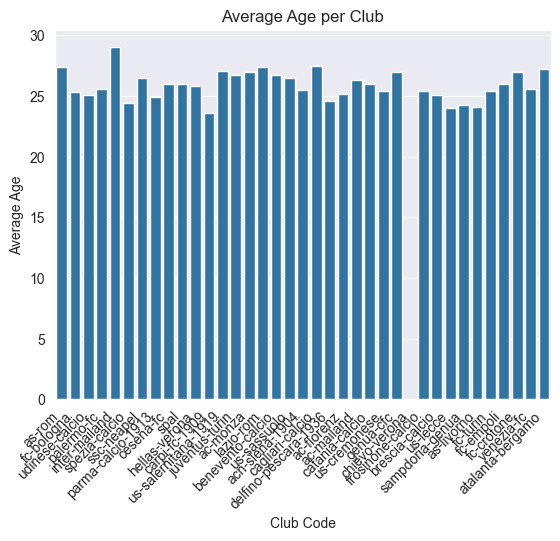

<Figure size 1500x800 with 0 Axes>

In [12]:
sns.barplot(x='club_code', y='average_age', data=dfItaly)
plt.title('Average Age per Club')
plt.xlabel('Club Code')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha="right")
plt.figure(figsize=(15, 8))
plt.show()

2.FOR A GIVEN TEAM THEIR GOALS AT HOME AND AWAY DURING A YEAR

In [36]:
dfGamesHomeGoals = games_df[['season', 'home_club_name', 'home_club_goals', 'away_club_goals']]
dfRealMadridHome = dfGamesHomeGoals[(dfGamesHomeGoals['home_club_name'] == 'Real Madrid Club de Fútbol') & (dfGamesHomeGoals['season'] == 2012)]
dfRealMadridHome

,season,home_club_name,home_club_goals,away_club_goals
1374,2012,Real Madrid Club de Fútbol,2,0
5124,2012,Real Madrid Club de Fútbol,5,1
5136,2012,Real Madrid Club de Fútbol,3,2
5143,2012,Real Madrid Club de Fútbol,4,0
7140,2012,Real Madrid Club de Fútbol,5,1
10875,2012,Real Madrid Club de Fútbol,6,2
12621,2012,Real Madrid Club de Fútbol,2,2
12623,2012,Real Madrid Club de Fútbol,1,1
12625,2012,Real Madrid Club de Fútbol,2,0
18335,2012,Real Madrid Club de Fútbol,4,0


In [59]:
total_home_goals = pd.DataFrame(
    {'Season': [dfRealMadridHome['season'].iloc[0]], 'Team': [dfRealMadridHome['home_club_name'].iloc[0]], 'Total_Goal_Home': [dfRealMadridHome['home_club_goals'].sum()],
     'Total_Goal_Away': [dfRealMadridHome['away_club_goals'].sum()]})
total_home_goals

,Season,Team,Total_Goal_Home,Total_Goal_Away
0,2012,Real Madrid Club de Fútbol,94,29


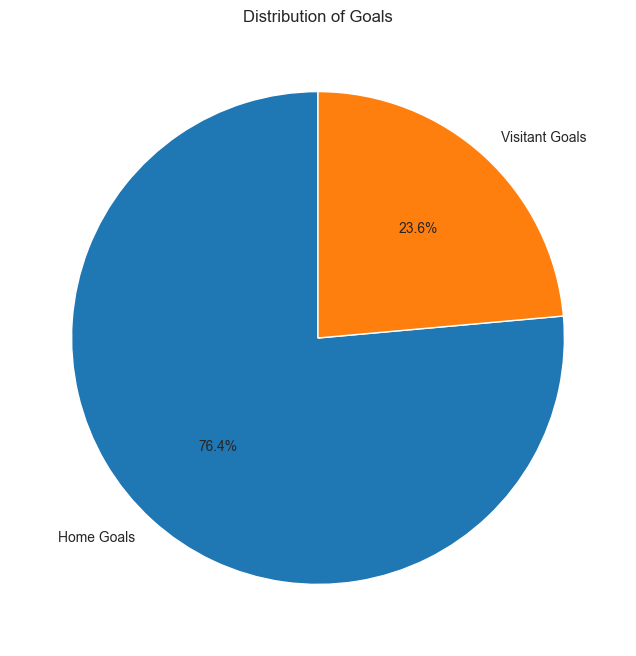

In [60]:
plt.figure(figsize=(8, 8))
plt.pie([total_home_goals['Total_Goal_Home'].values[0], total_home_goals['Total_Goal_Away'].values[0]], labels=['Home Goals', 'Visitant Goals'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Goals')
plt.show()

In [61]:
dfGamesAwayGoals = games_df[['season', 'away_club_name', 'home_club_goals', 'away_club_goals']]
dfRealMadridAway = dfGamesAwayGoals[(dfGamesAwayGoals['away_club_name'] == 'Real Madrid Club de Fútbol') & (dfGamesAwayGoals['season'] == 2012)]
dfRealMadridAway

,season,away_club_name,home_club_goals,away_club_goals
1183,2012,Real Madrid Club de Fútbol,3,2
1184,2012,Real Madrid Club de Fútbol,4,1
4851,2012,Real Madrid Club de Fútbol,1,2
6945,2012,Real Madrid Club de Fútbol,1,2
6946,2012,Real Madrid Club de Fútbol,2,3
10659,2012,Real Madrid Club de Fútbol,3,2
10660,2012,Real Madrid Club de Fútbol,1,0
12403,2012,Real Madrid Club de Fútbol,1,1
12407,2012,Real Madrid Club de Fútbol,2,1
14377,2012,Real Madrid Club de Fútbol,1,1


In [62]:
total_away_goals = pd.DataFrame(
    {'Season': [dfRealMadridAway['season'].iloc[0]], 'Team': [dfRealMadridAway['away_club_name'].iloc[0]], 'Total_Goal_Home': [dfRealMadridAway['home_club_goals'].sum()],
     'Total_Goal_Away': [dfRealMadridAway['away_club_goals'].sum()]})
total_away_goals

,Season,Team,Total_Goal_Home,Total_Goal_Away
0,2012,Real Madrid Club de Fútbol,43,59


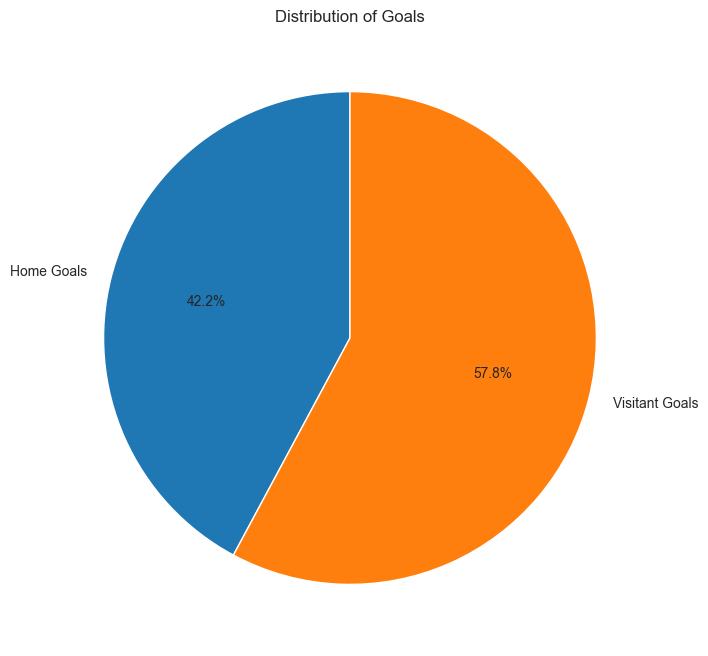

In [63]:
plt.figure(figsize=(8, 8))
plt.pie([total_away_goals['Total_Goal_Home'].values[0], total_away_goals['Total_Goal_Away'].values[0]], labels=['Home Goals', 'Visitant Goals'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Goals')
plt.show()

3. NUMBER OF NATIONAL PLAYERS OF THE TEAMS OF A CERTAIN COMPETITION

In [71]:
clubs_df1 = clubs_df[(clubs_df['domestic_competition_id'] == 'IT1')]
clubs_df2 = clubs_df1[['club_code','national_team_players']]
clubs_df2

,club_code,national_team_players
3,as-rom,17
32,fc-bologna,13
47,udinese-calcio,8
78,palermo-fc,4
79,inter-mailand,19
100,spezia-calcio,11
111,ssc-neapel,16
116,parma-calcio-1913,6
117,cesena-fc,0
123,spal,2


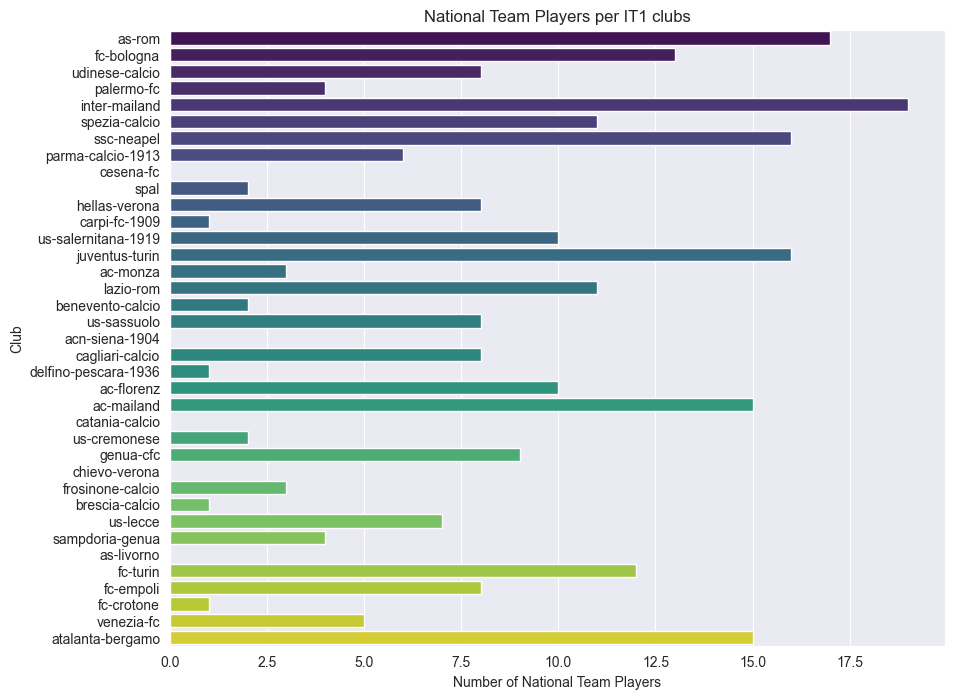

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x='national_team_players', y='club_code', data=clubs_df2, palette='viridis')
plt.title('National Team Players per IT1 clubs')
plt.xlabel('Number of National Team Players')
plt.ylabel('Club')
plt.show()

4. THE MOST VALUE PLAYERS IN A COMPETICION (MODIFICAR ESTE)

In [ ]:
competition = "ES1"

Function that given a competition returns the value, name and the year of the value for the first 200 highest values of players in a competition

In [ ]:
def getMoreValuePlayerCompetition(db, competition):
    try:
        collection = db["player_valuations"]
        query = {"player_club_domestic_competition_id": competition}
        value_players = list(collection.find(query).sort("market_value_in_eur", -1).limit(200))
        name_value = [{"name": playerName(db, item.get("player_id")), "value": item.get("market_value_in_eur"), "date": item.get("date")} for item in value_players]
        
        max_value = {}

        for player in name_value:
            name = player['name']
            value = player['value']
            date = player['date']
        
            if name in max_value:
                if value > max_value[name]['value']:
                    max_value[name] = {'value': value, 'date': date}
            else:
                max_value[name] = {'value': value, 'date': date}
        
        player_value_list = [{'name': name, 'value': data['value'], 'date': data['date'].strftime('%Y')} for name, data in max_value.items()]

        
        return player_value_list
    except Exception as e:
            print(f"Retrieval of Values failed: {e}")
            return []

Function that given a competition and a list of name, value, and year of value of a competition draws a bar chart graphic

In [ ]:
def plotGraphValues(data, competition):
    df = pd.DataFrame(data)

    df['date'] = pd.to_datetime(df['date']).dt.year

    df = df.sort_values(by=['date', 'name'])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='name', y='value', hue='date', data=df, palette='viridis', errorbar=None)

    plt.xlabel('Player')
    plt.ylabel('Value of Market (in millions)')
    plt.title(f'Market Values of Players Over Time for {competition}')
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45, ha='right')
    
    plt.yticks(plt.yticks()[0], [f'{round(y/1000000)}M' for y in plt.yticks()[0]])

    plt.tight_layout()
    plt.show()

In [ ]:
data = getMoreValuePlayerCompetition(db, competition)
print(data)

In [ ]:
plotGraphValues(data, competition)

5.PLAYERS THAT HAVE ONE OR MORE HATTRICKS IN A CERTAIN COMPETITION

In [76]:
appearances_df1 = Appearances_df[['player_name','goals','competition_id']]
appearances_df2 = appearances_df1[(appearances_df1['goals'] == 3) & (appearances_df1['competition_id'] == 'ES1')]
appearances_df2

,player_name,goals,competition_id
12670,Radamel Falcao,3,ES1
27627,Cristiano Ronaldo,3,ES1
33899,Lionel Messi,3,ES1
72850,Xabi Prieto,3,ES1
80533,Cristiano Ronaldo,3,ES1
...,...,...,...
1431208,Karim Benzema,3,ES1
1440380,Lázaro,3,ES1
1480235,Luis Suárez,3,ES1
1486837,Antoine Griezmann,3,ES1


In [86]:
players_numhattricks_df = pd.DataFrame()
players_numhattricks_df['player_name'] = appearances_df2['player_name']
players_numhattricks_df['numHattricks'] = 3
players_numhattricks_df = players_numhattricks_df.groupby('player_name', as_index=False)['numHattricks'].sum()
players_numhattricks_df

,player_name,numHattricks
0,Alexander Isak,3
1,Alexis Sánchez,3
2,Antoine Griezmann,9
3,Antonio Sanabria,6
4,Aritz Aduriz,9
5,Arnaut Danjuma,3
6,Carlos Bacca,6
7,Carlos Vela,3
8,Cesc Fàbregas,3
9,Charles,3


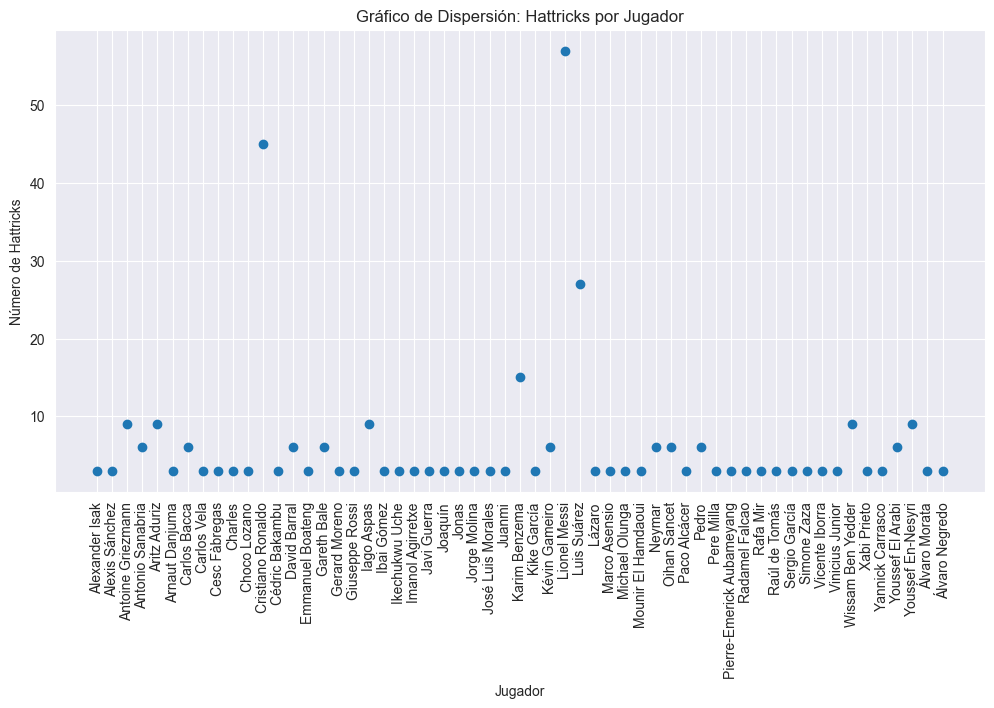

In [88]:
plt.figure(figsize=(12, 6))
plt.scatter(players_numhattricks_df['player_name'], players_numhattricks_df['numHattricks'])
plt.title('Gráfico de Dispersión: Hattricks por Jugador')
plt.xlabel('Jugador')
plt.ylabel('Número de Hattricks')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mejorar la legibilidad
plt.show()

6. COMPARATIVE OF AVERAGE GOALS OF EACH OF THE 5 BIG EUROPEAN LEAGUES SINCE A CERTAIN YEAR

In [ ]:
competition = "IT1"
season = 2012

a. Function that given a competition and a year gives us the number of home and away goals.

In [ ]:
def getHomeAndAwayGoals(db, competition_id, year):
    try:
        collection = db["games"]
        query = {"competition_id": competition_id, "season": year}
        results = list(collection.find(query))
        results_filtered = [{"competition": item.get("competition_id"), "home_goals": item.get("home_club_goals"), 
                             "away_goals": item.get("away_club_goals"), "year": item.get("season")} for item in results]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Games failed: {e}")
            return []

In [ ]:
sumGoals = getHomeAndAwayGoals(db, competition, season)
sumGoals

b. Modification of the list so that we can get for each match of the competition in a year the number of goals

In [ ]:
def getGoalsInMatch(list):
    for match in list:
        match['goals_in_match'] = match['home_goals'] + match['away_goals']
        del match['home_goals']
        del match['away_goals']
    return list

In [ ]:
l = getGoalsInMatch(sumGoals)
l

c. Function that given the previous list returns the average goals of a season of certain competition.

In [ ]:
def getAverageGoals(list):
    total_goals = sum(match['goals_in_match'] for match in list)
    average_goals = round(total_goals / len(list), 2)

    elem = {'competition': list[0]['competition'], 'year': list[0]['year'], 'average_goals_in_match': average_goals}
    return elem

In [ ]:
elem = getAverageGoals(l)
elem

d. Getting the information of each of the 5 leagues for the graphic

In [ ]:
#SPANISH LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"ES1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"ES1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"ES1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"ES1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_spain = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_spain

In [ ]:
#ITALIAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"IT1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"IT1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"IT1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"IT1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_italy = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_italy

In [ ]:
#ENGLISH LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"GB1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"GB1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"GB1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"GB1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_england = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_england

In [ ]:
#GERMAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"FR1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"FR1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"FR1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"FR1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_france = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_france

In [ ]:
#GERMAN LEAGUE
home_away_goals_2020 = getHomeAndAwayGoals(db,"L1",2020)
home_away_goals_2021 = getHomeAndAwayGoals(db,"L1",2021)
home_away_goals_2022 = getHomeAndAwayGoals(db,"L1",2022)
home_away_goals_2023 = getHomeAndAwayGoals(db,"L1",2023)

goals_in_match_2020 = getGoalsInMatch(home_away_goals_2020)
goals_in_match_2021 = getGoalsInMatch(home_away_goals_2021)
goals_in_match_2022 = getGoalsInMatch(home_away_goals_2022)
goals_in_match_2023 = getGoalsInMatch(home_away_goals_2023)

average_goals_2020 = getAverageGoals(goals_in_match_2020)
average_goals_2021 = getAverageGoals(goals_in_match_2021)
average_goals_2022 = getAverageGoals(goals_in_match_2022)
average_goals_2023 = getAverageGoals(goals_in_match_2023)

average_goals_germany = [average_goals_2020, average_goals_2021,average_goals_2022, average_goals_2023]
average_goals_germany

In [ ]:
def drawPlot(average_spain, average_italy, average_germany, average_france, average_england):
    color_map = {average_spain[0]["competition"]: 'blue', average_italy[0]["competition"]: 'green', 
                 average_germany[0]["competition"]: 'red', average_france[0]["competition"]: 'yellow',
                 average_england[0]["competition"]: 'orange'}

    plt.figure(figsize=(10, 6))

    for competition_data in [average_spain, average_italy, average_germany, average_france, average_england]:
        competition_name = competition_data[0]["competition"]
        color = color_map.get(competition_name, 'black')
        years = [entry['year'] for entry in competition_data]
        average_goals = [entry['average_goals_in_match'] for entry in competition_data]
        for year, avg_goals in zip(years, average_goals):
            plt.plot(years, average_goals, label=competition_name, color=color, marker='o')
            plt.text(year, avg_goals, f'{avg_goals:.2f}', ha='left', va='bottom', fontsize=8, color=color)



    plt.title('Average Goals per Match Over Years in the Big 5 European Leagues')
    plt.xlabel('Year')
    plt.ylabel('Average Goals per Match')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
drawPlot(average_goals_spain, average_goals_italy, average_goals_germany, average_goals_france, average_goals_england)

7. GOAL EVOLUTION OF A PLAYER OVER THE YEARS

In [ ]:
season = 2012
player_id = 28003

a. Function that takes game_id of a single season.

In [ ]:
def getGameIDsFromSeason(db, season):
    try: 
        collection = db["games"]
        query = {"season": season}
        results = list(collection.find(query))
        results_filtered = [{"game_id": item.get("game_id"), "year": season} for item in results]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [ ]:
games = getGameIDsFromSeason(db, season)
games

b. Function that gets the appearances of a certain player.

In [ ]:
def getPlayerAppearances(db, player_id):
    try:
        collection = db["appearances"]
        query = {"player_id": player_id}
        player_appearances = list(collection.find(query))
        results_filtered = [{"game": item.get("game_id"), "player": item.get("player_id"), "goals": item.get("goals")} for item in player_appearances]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

c. In the next cell we take out of the player appearances those appearances whose game_id is not included in the 'games' list.

In [ ]:
def filterPlayerAppearances(the_games, the_player_appearances):
    game_ids = {game['game_id'] for game in the_games}
    
    filtered_player_appearances = [appearance for appearance in the_player_appearances if appearance['game'] in game_ids]
    
    for item in filtered_player_appearances:
        item['year'] = the_games[0]['year']
    return filtered_player_appearances

d. It is calculated now the total goals of a player in a certain year.

In [ ]:
def getPlayerAppearancesInSeason(list):
    sum_goals = sum(entry['goals'] for entry in list)
    
    goals_player_year = {'game':list[0]['game'],'player':list[0]['player'],'total_goals':sum_goals, 'year':list[0]['year']}
    return goals_player_year

In [ ]:
total_appearances = getPlayerAppearances(db,player_id)

games_2012 = getGameIDsFromSeason(db, 2012)
games_2013 = getGameIDsFromSeason(db, 2013)
games_2014 = getGameIDsFromSeason(db, 2014)
games_2015 = getGameIDsFromSeason(db, 2015)
games_2016 = getGameIDsFromSeason(db, 2016)
games_2017 = getGameIDsFromSeason(db, 2017)
games_2018 = getGameIDsFromSeason(db, 2018)
games_2019 = getGameIDsFromSeason(db, 2019)
games_2020 = getGameIDsFromSeason(db, 2020)
games_2021 = getGameIDsFromSeason(db, 2021)
games_2022 = getGameIDsFromSeason(db, 2022)

appearances_in_games_2012 = filterPlayerAppearances(games_2012, total_appearances)
appearances_in_games_2013 = filterPlayerAppearances(games_2013, total_appearances)
appearances_in_games_2014 = filterPlayerAppearances(games_2014, total_appearances)
appearances_in_games_2015 = filterPlayerAppearances(games_2015, total_appearances)
appearances_in_games_2016 = filterPlayerAppearances(games_2016, total_appearances)
appearances_in_games_2017 = filterPlayerAppearances(games_2017, total_appearances)
appearances_in_games_2018 = filterPlayerAppearances(games_2018, total_appearances)
appearances_in_games_2019 = filterPlayerAppearances(games_2019, total_appearances)
appearances_in_games_2020 = filterPlayerAppearances(games_2020, total_appearances)
appearances_in_games_2021 = filterPlayerAppearances(games_2021, total_appearances)
appearances_in_games_2022 = filterPlayerAppearances(games_2022, total_appearances)

goals_2012 = getPlayerAppearancesInSeason(appearances_in_games_2012)
goals_2013 = getPlayerAppearancesInSeason(appearances_in_games_2013)
goals_2014 = getPlayerAppearancesInSeason(appearances_in_games_2014)
goals_2015 = getPlayerAppearancesInSeason(appearances_in_games_2015)
goals_2016 = getPlayerAppearancesInSeason(appearances_in_games_2016)
goals_2017 = getPlayerAppearancesInSeason(appearances_in_games_2017)
goals_2018 = getPlayerAppearancesInSeason(appearances_in_games_2018)
goals_2019 = getPlayerAppearancesInSeason(appearances_in_games_2019)
goals_2020 = getPlayerAppearancesInSeason(appearances_in_games_2020)
goals_2021 = getPlayerAppearancesInSeason(appearances_in_games_2021)
goals_2022 = getPlayerAppearancesInSeason(appearances_in_games_2022)

goals_years = [goals_2012,goals_2013,goals_2014,goals_2015,goals_2016,goals_2017,goals_2018,goals_2019,goals_2020,goals_2021,goals_2022]

In [ ]:
def drawFillPlot(goals_year):    
    years = [element['year'] for element in goals_year]
    total_goals = [element['total_goals'] for element in goals_year]
    
    plt.fill_between(years, 0, total_goals, alpha=0.5)
    
    plt.title('Area graphic')
    plt.xlabel('Year')
    plt.ylabel('Total Goals')
    plt.grid(True)
    
    plt.show()


In [ ]:
drawFillPlot(goals_years)

8. FOR A GIVEN TEAM NAME THE PERCENTAGE OF EACH NATIONALITY OF HIS PLAYERS

In [89]:
team_name = "Real Madrid"

Function that given a team name returns a list of all the player of the team and their nationality

In [90]:
def PlayersInTeam(db, team):
    try:
        collection = db["players"]
        query = {"current_club_name": team}
        players = list(collection.find(query))
        results = [{"nationality": item.get("country_of_citizenship")} for item in players]
        return results
    except Exception as e:
            print(f"Retrieval of Players failed: {e}")
            return []

Function that given a players nationalities and a team draw a pie graphic of the percentage of each nationality in the team

In [91]:
def graphTeamNationality(data, team):
    
    nationality_frequency = {}
    for item in data:
        nationality = item['nationality']
        nationality_frequency[nationality] = nationality_frequency.get(nationality, 0) + 1
    
    labels = nationality_frequency.keys()
    sizes = nationality_frequency.values()
    
    plt.figure(figsize=(12, 12))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    plt.title(f'Nationality distributor for {team}')
    plt.show()

In [92]:
nationality_players = PlayersInTeam(db, team_name)
nationality_players

[{'nationality': 'France'},
 {'nationality': 'Austria'},
 {'nationality': 'Germany'},
 {'nationality': 'Spain'},
 {'nationality': 'Belgium'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'France'},
 {'nationality': 'Brazil'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Croatia'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Brazil'},
 {'nationality': 'Ukraine'},
 {'nationality': 'France'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Argentina'},
 {'nationality': 'Dominican Republic'},
 {'nationality': 'Brazil'},
 {'nationality': 'Turkey'},
 {'nationality': None},
 {'nationality': 'Germany'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'Spain'},
 {'nationality': 'France'},
 {'nationality': 'Spain'},
 {'nationality': 'Dominican Republic'},
 {'nationality': 'Spain'},
 {'natio

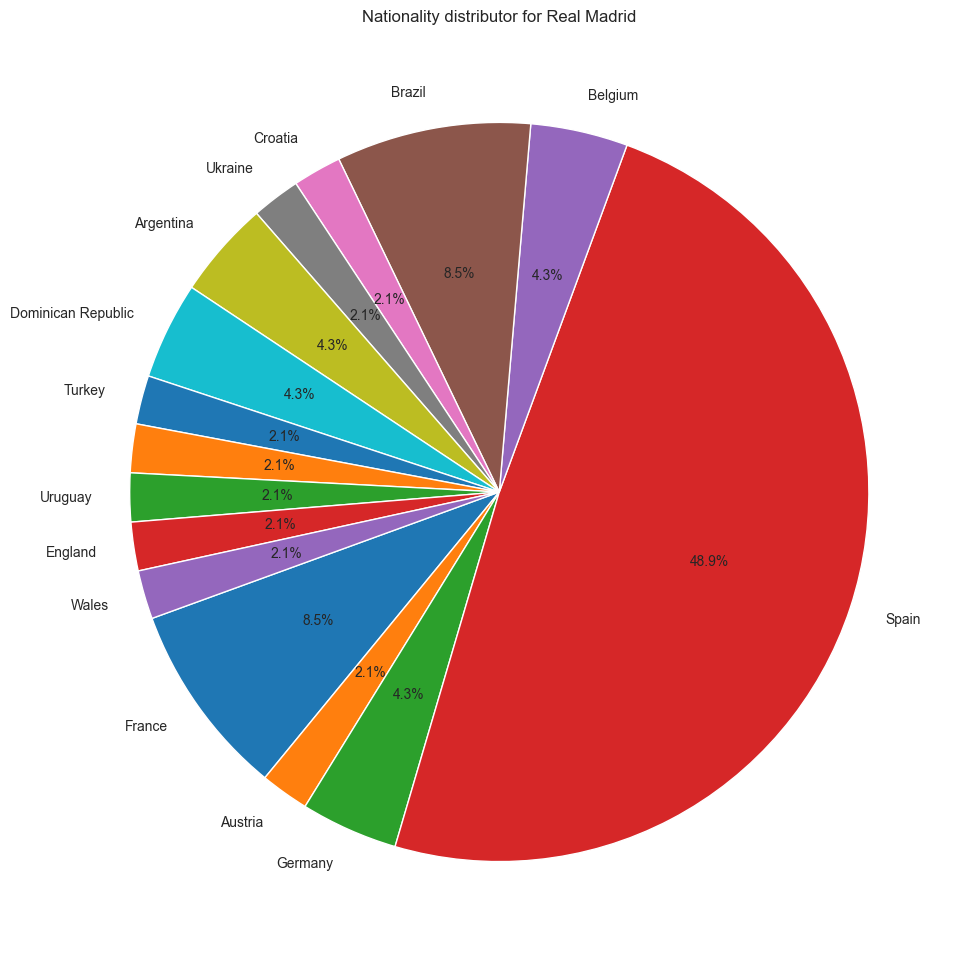

In [93]:
graphTeamNationality(nationality_players, team_name)

9. AGE DENSITY FOR EACH POSITION

a. Function that given a position returns all the players registered with that position.

In [ ]:
def getPlayersFromPosition(db, position):
    try:
        collection = db["players"]
        query = {"position": position, "date_of_birth": {"$ne": None}}
        result = list(collection.find(query))
        results_filtered = [{"last_season": item.get("last_season"), "date_birth": item.get("date_of_birth"), 
                             "position": item.get("position"),} for item in result]
        return results_filtered
    except Exception as e:
            print(f"Retrieval of Players failed: {e}")
            return []

b. Function that with the information of the previous function calculates the age of every player.

In [ ]:
from datetime import datetime

def calculateAges(position_list):
    for g in position_list:
        date_of_birth_str = str(g["date_birth"])
        date_of_birth = datetime.fromisoformat(date_of_birth_str)
        g["date_birth"] = date_of_birth.year
        g["age"] = g["last_season"] - date_of_birth.year
    return position_list
        

c. Get the lists for all the positions and then put them together to visualize the graphic.

In [ ]:
goalkeepers_list = getPlayersFromPosition(db, "Goalkeeper")
defenders_list = getPlayersFromPosition(db, "Defender")
midfielders_list = getPlayersFromPosition(db, "Midfield")
attackers_list = getPlayersFromPosition(db, "Attack")
    
goalkeepers = calculateAges(goalkeepers_list)
defenders = calculateAges(defenders_list)
midfielders = calculateAges(midfielders_list)
attackers = calculateAges(attackers_list)

total_positions = goalkeepers + defenders + midfielders + attackers

d. Function that draws the violin plot with the information solved.

In [ ]:
def drawViolinPlot(list_positions):
    df = pd.DataFrame(list_positions)
    violin = sns.catplot(x='position', y='age', data=df, kind='violin', palette='Paired')
    violin.set_xticklabels(rotation=45)
    plt.show()

In [ ]:
drawViolinPlot(total_positions)

10. EVOLUTION OF THE ATTENDANCE TO A CLUB STATION IN A YEAR

In [95]:
games_df1 = games_df[['season','home_club_name', 'attendance', 'away_club_name']]
games_df1

,season,home_club_name,attendance,away_club_name
0,2012,RFK Akhmat Grozny,21700.0,FK Spartak Moskva
1,2012,PFK Krylya Sovetov Samara,11400.0,Amkar Perm
2,2012,PFK CSKA Moskva,12000.0,FK Dinamo Moskva
3,2012,"Футбольный клуб ""Локомотив"" Москва",11408.0,FC Rubin Kazan
4,2012,PFK Krylya Sovetov Samara,7534.0,Volga Nizhniy Novgorod (- 2016)
...,...,...,...,...
65211,2013,Eindhovense Voetbalvereniging Philips Sport Ve...,10000.0,NaN
65212,2015,Eindhovense Voetbalvereniging Philips Sport Ve...,31000.0,NaN
65213,2018,Eindhovense Voetbalvereniging Philips Sport Ve...,34200.0,NaN
65214,2023,Stoke City,9410.0,NaN


In [100]:
games_df2 = games_df1[(games_df1['season'] == 2012) & (games_df1['home_club_name'] == 'Borussia Dortmund')]
games_df2

,season,home_club_name,attendance,away_club_name
101,2012,Borussia Dortmund,80645.0,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH
169,2012,Borussia Dortmund,65829.0,AFC Ajax Amsterdam
1184,2012,Borussia Dortmund,65829.0,Real Madrid Club de Fútbol
10390,2012,Borussia Dortmund,80645.0,Borussia Verein für Leibesübungen 1900 Mönchen...
10402,2012,Borussia Dortmund,80645.0,Hannover 96
14367,2012,Borussia Dortmund,80645.0,Verein für Bewegungsspiele Stuttgart 1893
21485,2012,Borussia Dortmund,80645.0,Hamburger SV
21490,2012,Borussia Dortmund,80400.0,FC Augsburg 1907
25137,2012,Borussia Dortmund,80645.0,Verein für Leibesübungen Wolfsburg
25141,2012,Borussia Dortmund,80645.0,1. Fußball- und Sportverein Mainz 05


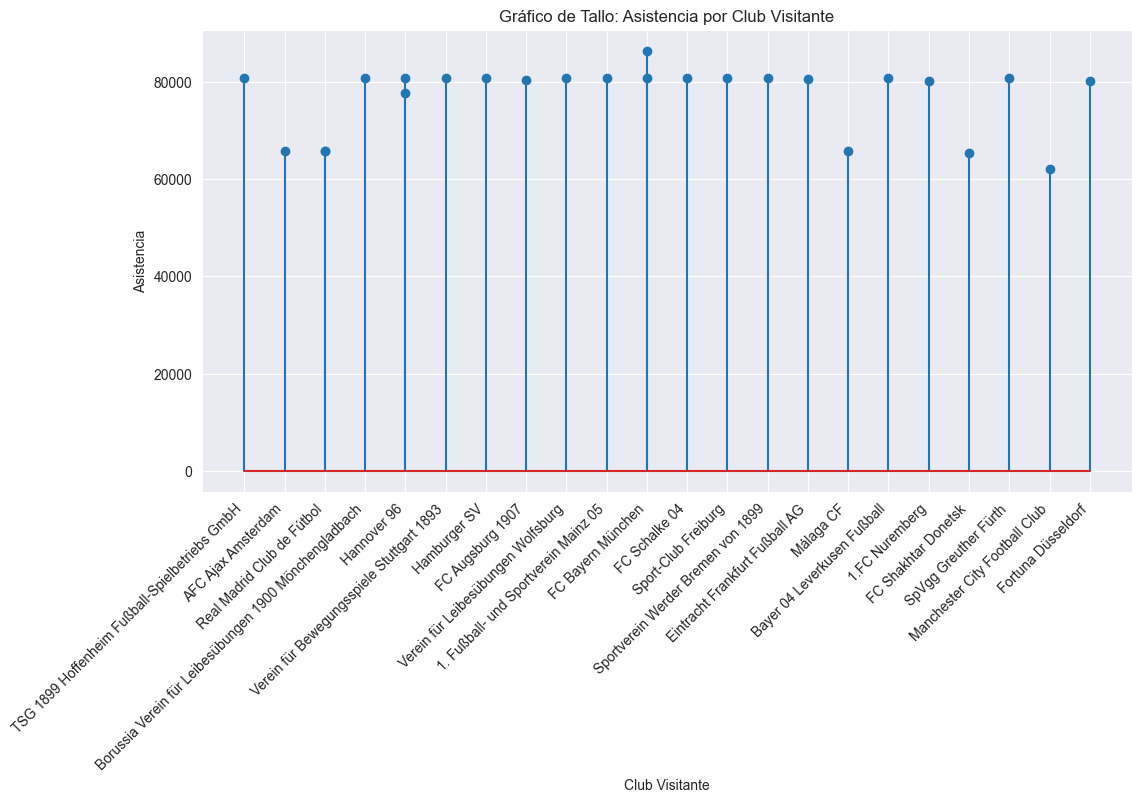

In [101]:
plt.figure(figsize=(12, 6))
plt.stem(games_df2['away_club_name'], games_df2['attendance'])
plt.title('Gráfico de Tallo: Asistencia por Club Visitante')
plt.xlabel('Club Visitante')
plt.ylabel('Asistencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje X para mejorar la legibilidad
plt.show()